In [1]:
import sys

sys.path[0] = '/bbkinghome/mbarrera/git_supply/nndp/src'

import sys
import pandas as pd
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import optax
import nndp

In [2]:
from model import u, m, F, policy, T, k_star

In [3]:
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
params, nn = nndp.initialize_deep_nn(subkey,
                                n_states = 3,
                                n_actions = 1,
                                nodes_per_layer = 256,
                                hidden_layers = 2,
                                hidden_activation = jax.nn.tanh,
                                output_activation = [jax.nn.relu])


def normalize_params(params:dict)->dict:
    for layer in params.keys():
        params[layer]['w'] = params[layer]['w'] / jnp.sqrt(params[layer]['w'].shape[0])
    return params

params = normalize_params(params)

In [4]:
key, subkey = jax.random.split(key)

params,result = nndp.train(key = subkey,
               params = params,
               nn = nn,
               policy = policy,
               u = u,
               m = m,
               F = F,
               T = T,
               N_simul = 10,
               batch_size = 100,
               epochs = 5000,
               optimizer = optax.adam(1e-4)
               )

Objective value on training iteration 4999 out of 5000: 29.533514022827158

<Axes: title={'center': 'Convergence of Objective Function'}, xlabel='Epoch', ylabel='Objective Function'>

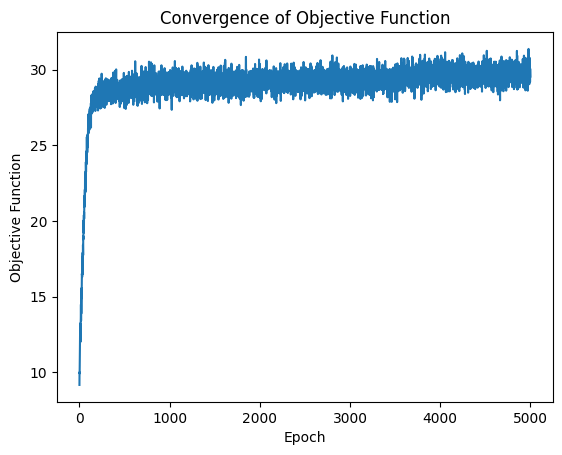

In [5]:
result.plot_convergence()

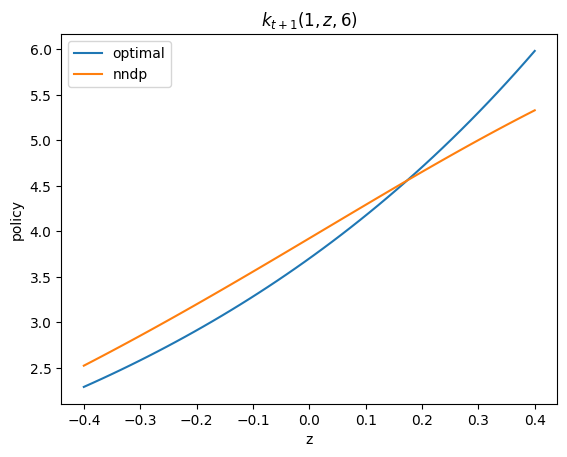

In [6]:
z = jnp.linspace(-0.4,0.4)
k = 6
t = 1
state =jnp.column_stack([jnp.ones_like(z)*t, z, jnp.ones_like(z)*k])
fig, ax = plt.subplots()
ax.plot(z, k_star(z), label='optimal')
ax.plot(z, policy(state, params, nn), label='nndp')
ax.set(xlabel='z',ylabel='policy', title=f'$k_{{t+1}}({t},z,{k})$')
ax.legend()
fig.show()

In [9]:
from model import alpha, delta, r

In [10]:
z = 0
jnp.array([1/(1+r)**t*(jnp.exp(z)*k_star(z)**alpha -delta*k_star(z)) for t in range(0,T)]).sum(axis=0)\
    +1/(1+r)**T*(jnp.exp(z)*k_star(z)**alpha+(1-delta)*k_star(z))

Array(13.221798, dtype=float32)

$$V(t,z,k)=\max_{k'}e^z k^\alpha - (k'-(1-\delta)k)+\frac{1}{1+r}V(t+1,z,k'),\qquad V(T+1,z,k)=0$$

$$1+r=V_k(t+1,z,k')\ for\ t<T\qquad k'=0\ for\ t=T$$

In [11]:
z = 0
k = 5.
nndp.core.evaluate_policy(key,
                          policy,
                          params,
                          nn,
                          u,
                          m,
                          s0 = jnp.array([[0,z,k]]),
                          T = T,
                          N_simul = 1)

Array([[16.089043]], dtype=float32)

In [12]:
jnp.exp(z)*k**alpha-(k_star(z)-(1-delta)*k)+1/(1+r)*(jnp.exp(z)*k_star(z)**alpha+(1-delta)*k_star(z))

Array(7.1990905, dtype=float32, weak_type=True)

In [13]:
jnp.exp(0.4)*k**(1/3)-k

Array(-2.4490156, dtype=float32, weak_type=True)

In [15]:
policy(jnp.array([[0,0.4,1]]), params, nn)

Array([[6.355498]], dtype=float32)

 message: Solution found.
 success: True
  status: 0
     fun: -0.7013339
       x: 0.3508536
     nit: 21
    nfev: 21

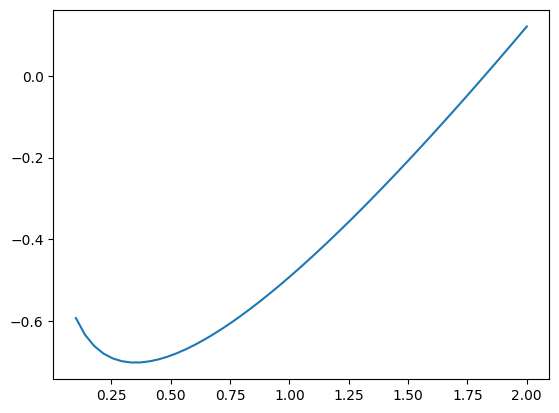

In [16]:
from scipy.optimize import minimize_scalar
a = lambda k: -(jnp.exp(0.4)*k**(1/3)-k)
k = jnp.linspace(0.1,2)
plt.plot(k, a(k))
minimize_scalar(a, bracket=[0.1,10], bounds = [0.1,3])

In [17]:
jnp.exp(0.4)

Array(1.4918247, dtype=float32, weak_type=True)

In [18]:
nndp.core.evaluate_policy(key,
                          policy,
                          params,
                          nn,
                          u,
                          m,
                          s0=jnp.array([[0,0,1.]]),
                          T=T,
                          N_simul=1)

Array([[11.777475]], dtype=float32)

In [19]:
(1/(1+0.04))**2

0.9245562130177513

In [20]:
u(jnp.array([[0,1,0]]), jnp.array([2]))

Array([-2.], dtype=float32)

In [21]:
policy(jnp.array([[0,1,0]]), params, nn)

Array([[11.047342]], dtype=float32)

In [22]:
policy(jnp.array([30,3,3]), params, nn)

Array([[0.]], dtype=float32)

In [23]:
u(jnp.array([0,1,1]),jnp.array([1]))

Array(2.6182818, dtype=float32)

In [24]:
key = jax.random.PRNGKey(0)
m(key, jnp.array([[0,1,1]]),jnp.array([[1.5]]))

Array([[1.       , 0.9794158, 1.5      ]], dtype=float32)

In [25]:
F(key= jax.random.PRNGKey(0) , N=1)

Array([[ 0.        ,  0.58665144, 11.235309  ]], dtype=float32)

In [26]:
key = jax.random.PRNGKey(0)
params, nn = nndp.initialize_deep_nn(key,
                                n_states = 3,
                                n_actions = 1,
                                nodes_per_layer = 256,
                                hidden_layers = 3,
                                hidden_activation = jax.nn.tanh,
                                output_activation = [jax.nn.relu])

In [27]:
policy(jnp.array([[0,2,1]]), params, nn)

Array([[0.26141343]], dtype=float32)

In [28]:
from nndp import evaluate_policy

key = jax.random.PRNGKey(0)

evaluate_policy(key = key,
                policy = policy,
                params = params,
                nn = nn,
                u = u,
                m = m,
                s0 = jnp.array([[0,1.,1.]]),
                T = 0,
                N_simul = 1)


Array([[3.4619365]], dtype=float32)

In [29]:
policy(jnp.array([[0,1.,1.]]), params, nn)

Array([[0.15634528]], dtype=float32)

In [30]:
u(jnp.array([[0,1.,1.]]), policy(jnp.array([[0,1.,1.]]), params, nn))

Array([3.4619365], dtype=float32)

In [31]:
u(jnp.array([[0,1.,1.]]), jnp.array([0]))

Array([3.6182818], dtype=float32)

In [ ]:
params

{'linear': {'w': Array([[ 4.61147092e-02, -9.34243947e-02, -6.79763556e-02,
           3.00944388e-01, -7.36520410e-01, -2.34205842e-01,
          -1.63559943e-01,  7.27895945e-02, -6.62947670e-02,
          -1.32491663e-01,  2.26811424e-01,  5.39979696e-01,
          -4.49149497e-02, -3.41979384e-01, -1.66633159e-01,
          -5.99614859e-01, -7.33612701e-02,  5.73329568e-01,
          -1.65594310e-01, -5.45871615e-01, -3.31876464e-02,
           6.86597347e-01, -9.93490696e-01,  4.82242107e-01,
           2.16071814e-01, -2.12265506e-01, -2.32248321e-01,
          -1.21517673e-01,  2.89913714e-01,  8.08311880e-01,
          -5.03322899e-01,  6.22503042e-01, -3.96303862e-01,
          -9.12250340e-01, -9.91572142e-02, -9.38085854e-01,
           1.30373657e-01,  5.13039351e-01,  2.21026614e-02,
          -1.15089439e-01,  6.91006422e-01,  4.76047456e-01,
           1.11466408e+00, -1.01811051e+00,  7.16521963e-02,
           1.80341557e-01,  4.67382133e-01, -5.96623123e-01,
         